# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
from keras.preprocessing import image
from glob import glob
import cv2, os, random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [2]:
path='../dataset/dogs-vs-cats/train/'

In [3]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [4]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [5]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [6]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [7]:
classes = ['dog', 'cat']

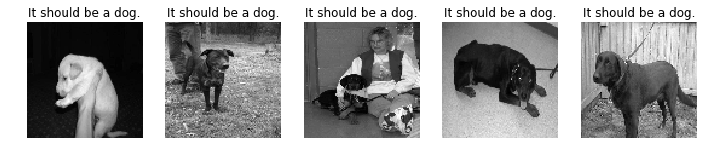

In [8]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

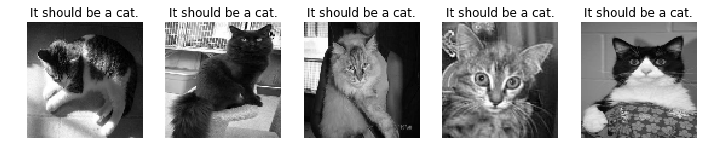

In [9]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [10]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [11]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [12]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [13]:
len(X)

2222

In [14]:
IMG_CHANNEL = 1
BATCH_SIZE = 32
N_EPOCH = 40
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [15]:
## One-Hot Encoding
y = np_utils.to_categorical(y, N_CLASSES)

In [17]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIM, metrics=['accuracy'])

In [20]:
## to save checkpoint to use later
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_checkpoint.h5')
model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT,
          verbose=VERBOSE, callbacks=[checkpoint])

W0819 12:33:44.489949  2716 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1777 samples, validate on 445 samples
Epoch 1/40
 - 57s - loss: 0.7012 - acc: 0.6128 - val_loss: 0.8165 - val_acc: 0.0000e+00
Epoch 2/40
 - 57s - loss: 0.6566 - acc: 0.6252 - val_loss: 0.8406 - val_acc: 0.0022
Epoch 3/40
 - 57s - loss: 0.6343 - acc: 0.6353 - val_loss: 1.0628 - val_acc: 0.0989
Epoch 4/40
 - 57s - loss: 0.5863 - acc: 0.6764 - val_loss: 0.6818 - val_acc: 0.6427
Epoch 5/40
 - 57s - loss: 0.5266 - acc: 0.7214 - val_loss: 0.7368 - val_acc: 0.6180
Epoch 6/40
 - 56s - loss: 0.4660 - acc: 0.7732 - val_loss: 0.6784 - val_acc: 0.6719
Epoch 7/40
 - 58s - loss: 0.4105 - acc: 0.8064 - val_loss: 1.0686 - val_acc: 0.5124
Epoch 8/40
 - 56s - loss: 0.3628 - acc: 0.8413 - val_loss: 0.5603 - val_acc: 0.7348
Epoch 9/40
 - 56s - loss: 0.3033 - acc: 0.8734 - val_loss: 1.1564 - val_acc: 0.5551
Epoch 10/40
 - 56s - loss: 0.2526 - acc: 0.8869 - val_loss: 1.3868 - val_acc: 0.5371
Epoch 11/40
 - 56s - loss: 0.1838 - acc: 0.9246 - val_loss: 1.4778 - val_acc: 0.5843
Epoch 12/40
 - 56s - lo

In [21]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY\n{}: {}%'.format(model.metrics_names[1], scores[1]*100))

MODEL ACCURACY
acc: 92.43924392707493%
